Practice
=
How to calculate the annual total rainfall and the anomaly of a daily data of four synoptic stations in Ghana.

In [1]:
import numpy as un
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as dp

In [22]:
#Reading the four stations data and renaming their headings as year, month, day and PREP using pandas
y=dp.read_fwf('Yendi_1983_2017_dRR_gapless.txt', names=['Year','Month','Day','PREP'])
t=dp.read_fwf('Tamale_1983_2017_dRR_gapless.txt', names=['Year','Month','Day','PREP'])
we=dp.read_fwf('Wenchi_1983_2017_dRR_gapless.txt', names=['Year','Month','Day','PREP'])
wa=dp.read_fwf('Wa_1983_2017_dRR_gapless.txt', names=['Year','Month','Day','PREP'])

In [23]:
y

,Year,Month,Day,PREP
0,1983,1,1,0.0
1,1983,1,2,0.0
2,1983,1,3,0.0
3,1983,1,4,0.0
4,1983,1,5,0.0
...,...,...,...,...
12779,2017,12,27,0.0
12780,2017,12,28,0.0
12781,2017,12,29,0.0
12782,2017,12,30,0.0


In [24]:
# setting the year, month and day as datetime
y['Date']= dp.to_datetime(y[['Year','Month','Day']])
t['Date']= dp.to_datetime(t[['Year','Month','Day']])
we['Date']= dp.to_datetime(we[['Year','Month','Day']])
wa['Date']= dp.to_datetime(wa[['Year','Month','Day']])

In [25]:
#To drop the columns year, month and day and set the Date as the datetime
yd=y[['PREP','Date']].set_index('Date')
td=t[['PREP','Date']].set_index('Date')
wed=we[['PREP','Date']].set_index('Date')
wad=wa[['PREP','Date']].set_index('Date')

In [26]:
#Calculating the annual total precipitation for the four stations
Ay=yd.resample('y').sum()
At=td.resample('y').sum()
Awe=wed.resample('y').sum()
Awa=wad.resample('y').sum()

Text(0, 0.5, 'Total Precipitation (mm)')

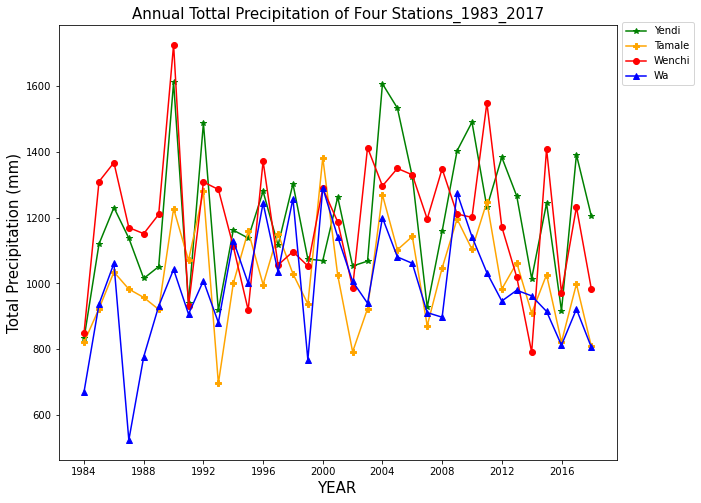

In [27]:
#Plotting the T_P for all the stations on the same figure annd labelling it
fig=plt.figure(figsize=(10,8))
plt.plot(Ay, marker='*', color='green', label='Yendi')
plt.plot(At, marker='P', color='orange',label='Tamale')
plt.plot(Awe, marker='o', color='red', label='Wenchi')
plt.plot(Awa, marker='^', color='blue', label='Wa')
plt.legend(loc='lower left',bbox_to_anchor=(1,0.85))
plt.title('Annual Tottal Precipitation of Four Stations_1983_2017', fontsize=15)
plt.xlabel('YEAR',fontsize=15)
plt.ylabel('Total Precipitation (mm)',fontsize=15)

Annual precipitation anomaly for all the four stations.
=

In [28]:
#An anomaly is can be define as the deviation from the climatological value of any atmospheric parameter.
# Calculate the yearly mean of the data and subtract the mean from each year value to get the anomaly.

ymean=un.mean(Ay['PREP'], axis=0)
tmean=un.mean(At['PREP'], axis=0)
wemean=un.mean(Awe['PREP'], axis=0)
wamean=un.mean(Awa['PREP'], axis=0)

In [29]:
#Anomaly calculation
y_AN=Ay['PREP']-ymean
t_AN=At['PREP']-tmean
we_AN=Awe['PREP']-wemean
wa_AN=Awa['PREP']-wamean



In [30]:
#Change the anomalies into a dataframe 
Ya=dp.DataFrame(y_AN)
Ta=dp.DataFrame(t_AN)
WEa=dp.DataFrame(we_AN)
WAa=dp.DataFrame(wa_AN)

No handles with labels found to put in legend.


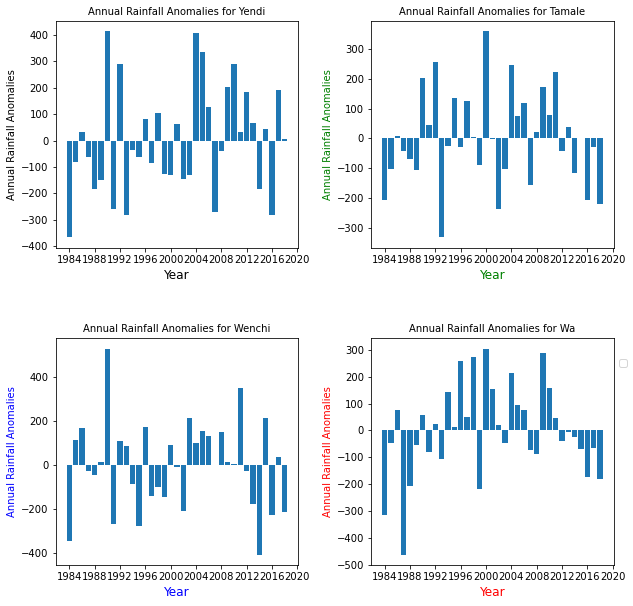

In [31]:
#Plotting subplot foor the four stations
fig,axes=plt.subplots(figsize=(10,10), ncols=2, nrows=2)
plt.subplots_adjust(hspace = 0.4, wspace = 0.3)
x1 = axes[0,0]
x1.bar(Ya.index,Ya.PREP,width=300)

x1.set_xlabel('Year',color='black',fontsize=12)
x1.set_ylabel('Annual Rainfall Anomalies',color='black', fontsize=10)
x1.set_title('Annual Rainfall Anomalies for Yendi',fontsize=10)

x2 = axes[0,1]
x2.bar(Ta.index,Ta.PREP,width=300)
x2.set_xlabel('Year',color='green',fontsize=12)
x2.set_ylabel('Annual Rainfall Anomalies',color='green', fontsize=10)
x2.set_title('Annual Rainfall Anomalies for Tamale',fontsize=10)


x3 = axes[1,0]
x3.bar(WEa.index, WEa.PREP,width=300)
x3.set_xlabel('Year',color='blue',fontsize=12)
x3.set_ylabel('Annual Rainfall Anomalies',color='blue', fontsize=10)
x3.set_title('Annual Rainfall Anomalies for Wenchi',fontsize=10)


x4 = axes[1,1]
x4.bar(WAa.index,WAa.PREP, width=300)
x4.set_xlabel('Year',color='red',fontsize=12)
x4.set_ylabel('Annual Rainfall Anomalies',color='red', fontsize=10)
x4.set_title('Annual Rainfall Anomalies for Wa',fontsize=10)

plt.legend(loc='lower left', bbox_to_anchor=(1,0.85))


HOW TO PLOT THE ANOMALY IN DIFFERENTE COLOR WHEN IT'S NEGATTIVE.
=

In [32]:
#a A function for calculating the anomaly for every station
def Ano (data):
    mean=un.mean(data)
    anomaly=data-mean
    return anomaly

In [33]:
#Anomaly using the function.First find the mean of the yearly total and subtract the mean fron each year value.
Yendi=Ano(Ay)
Tamale=Ano(At)
Wenchi=Ano(Awe)
Wa=Ano(Awa)

Text(0.5, 0, 'Year')

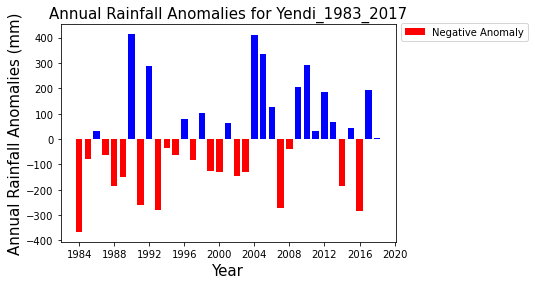

In [34]:
#plotting the anomlies
Yendi["color"] = un.where(Yendi["PREP"]<0, 'red', 'blue')

fig = plt.bar(Yendi.index,Yendi.PREP, color=Yendi.color, width=270,label='Negative Anomaly')#label=Yendi.color

#setting the legend outside the plot
plt.legend(loc='lower left',bbox_to_anchor=(1,0.9))
plt.title('Annual Rainfall Anomalies for Yendi_1983_2017', fontsize=15)
plt.ylabel('Annual Rainfall Anomalies (mm)',color='black', fontsize=15)
plt.xlabel('Year',color='black', fontsize=15)


Text(0.5, 0, 'Year')

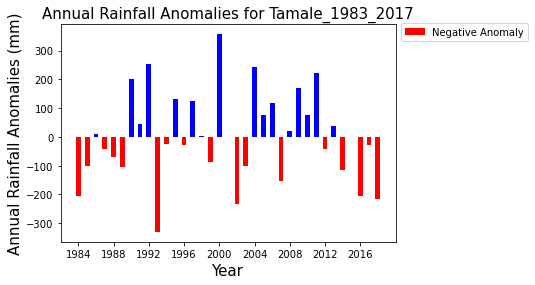

In [35]:
#Writing a functio for the plotting
for i in Tamale.PREP:
    Tamale['colors'] = ['red' if float(
       x) < 0 else 'blue' for x in Tamale['PREP']]


fig = plt.bar(Tamale.index,Tamale.PREP,color=Tamale.colors, width=200,label='Negative Anomaly')

#setting the legend outside the plot
plt.legend(loc='lower left',bbox_to_anchor=(1,0.9))
plt.title('Annual Rainfall Anomalies for Tamale_1983_2017', fontsize=15)
plt.ylabel('Annual Rainfall Anomalies (mm)',color='black', fontsize=15)
plt.xlabel('Year',color='black', fontsize=15)


Text(0.5, 0, 'Year')

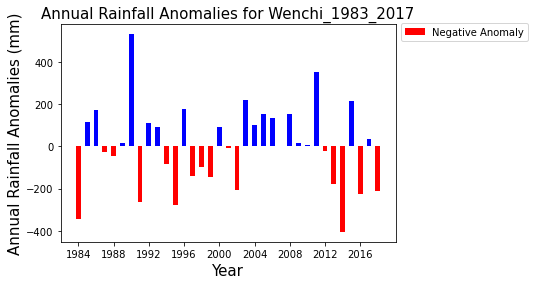

In [36]:
#Writing a functio for the plotting
for i in Wenchi.PREP:
   Wenchi['colors'] = ['red' if float(
       x) < 0 else 'blue' for x in  Wenchi['PREP']]


fig = plt.bar( Wenchi.index, Wenchi.PREP,color= Wenchi.colors, width=200,label='Negative Anomaly')

#setting the legend outside the plot
plt.legend(loc='lower left',bbox_to_anchor=(1,0.9))
plt.title('Annual Rainfall Anomalies for Wenchi_1983_2017', fontsize=15)
plt.ylabel('Annual Rainfall Anomalies (mm)',color='black', fontsize=15)
plt.xlabel('Year',color='black', fontsize=15)


Text(0.5, 0, 'Year')

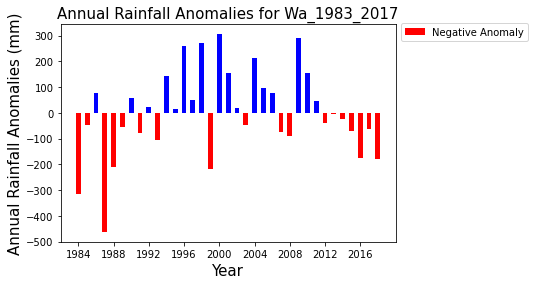

In [37]:
#Writing a functio for the plotting
for i in Wa.PREP:
   Wa['colors'] = ['red' if float(
       x) < 0 else 'blue' for x in  Wa['PREP']]


fig = plt.bar( Wa.index,Wa.PREP,color= Wa.colors, width=200,label='Negative Anomaly')

#setting the legend outside the plot
plt.legend(loc='lower left',bbox_to_anchor=(1,0.9))
plt.title('Annual Rainfall Anomalies for Wa_1983_2017', fontsize=15)
plt.ylabel('Annual Rainfall Anomalies (mm)',color='black', fontsize=15)
plt.xlabel('Year',color='black', fontsize=15)


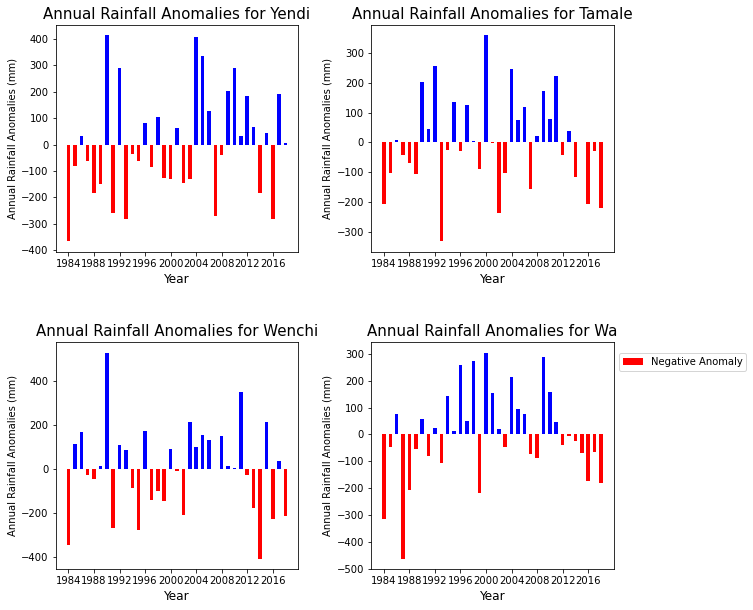

In [48]:
fig,axes=plt.subplots(figsize=(10,10), ncols=2, nrows=2)
plt.subplots_adjust(hspace = 0.4, wspace = 0.3)
x1 = axes[0,0]
x1.bar(Yendi.index,Yendi.PREP, color=Yendi.color, width=200)

x1.set_xlabel('Year',color='black',fontsize=12)
x1.set_ylabel('Annual Rainfall Anomalies (mm)',color='black', fontsize=10)
x1.set_title('Annual Rainfall Anomalies for Yendi',fontsize=15)

x2 = axes[0,1]
x2.bar(Tamale.index,Tamale.PREP,color=Tamale.colors, width=200)
x2.set_xlabel('Year',color='black',fontsize=12)
x2.set_ylabel('Annual Rainfall Anomalies (mm)',color='black', fontsize=10)
x2.set_title('Annual Rainfall Anomalies for Tamale',fontsize=15)


x3 = axes[1,0]
x3.bar(Wenchi.index, Wenchi.PREP,color= Wenchi.colors, width=200)
x3.set_xlabel('Year',color='black',fontsize=12)
x3.set_ylabel('Annual Rainfall Anomalies (mm)',color='black', fontsize=10)
x3.set_title('Annual Rainfall Anomalies for Wenchi',fontsize=15)
# plt.legend(loc='lower left', bbox_to_anchor=(1,0.85))

x4 = axes[1,1]
x4.bar( Wa.index,Wa.PREP,color= Wa.colors, width=200, label='Negative Anomaly')
x4.set_xlabel('Year',color='black',fontsize=12)
x4.set_ylabel('Annual Rainfall Anomalies (mm)',color='black', fontsize=10)
x4.set_title('Annual Rainfall Anomalies for Wa',fontsize=15)

plt.legend(loc='lower left', bbox_to_anchor=(1,0.85))


In [42]:
# Wenchi["Color"] = un.where(Awe['PREP']<1373.52, 'red', 'blue')

# fig = plt.figure(figsize=(10,8))
# fig.add_callback(
#     plt.bar(name='PREP',
#            x=Wenchi.index,
#            y=Wenchi['PREP'],
#            marker_color=Wenchi['Color']))
# fig.update_layout(barmode='stack')
# fig.show()

In [ ]:
fig.add_